In [1]:
import numpy as np
from findiff import FinDiff

from cc_constants import CC_Constants
from spin_projections import Spin_projections
from initial_conditions_integration import PrecomputeSafeInitialConditions
from cc_couplings import CC_Couplings
from radial_interactions import woods_saxon_potential, woods_saxon_prime, woods_saxon_deformed_interaction
from cc_asymptotics import CC_Asymptotics
from cc_hf_system_solver import CC_exact_solver



In [2]:
# const = CC_Constants(48.0, 1.0, 18.00, [0, 2.2])
# class_att = CC_Couplings(48.0, 1.0, 18.0, [0.0,2.2], [0.0,2.0], 1, 1, 10.0, CC_Constants)
# couplings_pos, couplings_neg, quantum_numb_pos, quantum_numb_neg = class_att.couplings_J_max(2)
# #print(quantum_numb_neg[1])

In [3]:
# const = CC_Constants(48.0, 1.0, 18.00, [0, 2.2])
# class_att = CC_Couplings(48.0, 1.0, 18.0, [0.0,2.2], [0.0,2.0], 1, 1, 10.0, CC_Constants)
# couplings_pos, couplings_neg, quantum_numb_pos, quantum_numb_neg = class_att.couplings_J_max(2)
# class_proj_att = Spin_projections(quantum_numb_pos, quantum_numb_neg, np.linspace(1e-4, np.pi, 180), solution_number=0)
# projection_pos, projection_neg = class_proj_att.precompute_spin_projections()
# E_pos_arr, E_neg_arr, l_pos_arr, l_neg_arr = class_att.energy_centrifugal_arrays()
# class_asymp_att = CC_Asymptotics(E_pos_arr, E_neg_arr, l_pos_arr, l_neg_arr, const)
# Hp_pos_arr, Hpp_pos_arr, Hm_pos_arr, Hmp_pos_arr, Hp_neg_arr, Hpp_neg_arr, Hm_neg_arr, Hmp_neg_arr = class_asymp_att.CC_Coulombf(10.0)


In [4]:
att_solver = CC_exact_solver(12.0, 1.0, 10.0, [0.0,2.2], [0.0,2.0], 1, 1, 7.0)




/Users/manuelfranciscocatacorarios/fewbody/emulator_project_root/CC_emulator_v3/cc_asymptotics.py:81: ComplexWarning: Casting complex values to real discards the imaginary part
  k_block = np.sqrt(np.float64(1 / self.constants.h2_mass) * E_block.astype(np.float64))


In [48]:
sol_matrix_pos, sol_matrix_neg = att_solver.solve_CC_J_max(1.4, 98.57652988, 12**(1/3)*2.27742508,  0.7779522)

In [49]:
for i,psi in enumerate(sol_matrix_neg):
    rank = np.linalg.matrix_rank(psi[:,:,-1])
    print(rank)

3
4
4
4


In [5]:
S_matrix_pos, S_matrix_neg = att_solver.solve_CC_S_matrix_Jmax(1.4, 98.57652988, 12**(1/3)*2.27742508,  0.7779522)
k_arr_pos_ = att_solver.k_array_pos
k_arr_pos_inv = att_solver.k_array_pos_inv

k_arr_neg_ = att_solver.k_array_neg
k_arr_neg_inv = att_solver.k_array_neg_inv

print(len(S_matrix_pos), len(att_solver.k_array_pos), len(S_matrix_neg), len(att_solver.k_array_neg))










4 4 4 4


In [6]:
S_vect_pos = []
for k in range(len(S_matrix_pos)):
    S_vect_pos.append(S_matrix_pos[k][:,0])

S_vect_neg = []
for k in range(len(S_matrix_neg)):
    S_vect_neg.append(S_matrix_neg[k][:,0])

In [7]:
mom_elastic = (att_solver.k_array_neg[0][0][0])**2
S_matrix_fresco_pos = []
S_matrix_fresco_neg = []

S_matrix_fresco_pos.append([ -0.0428868899 - 1j*0.4329262805 -1.0, 0.9410718602 +  1j*0.2081902385])
S_matrix_fresco_neg.append([-0.3501783069  -1j*0.2254219430 -1.0 , -0.5973005938  -1j*0.2144323050, 0.6041920643  -1j*0.4234315671 ])
S_matrix_fresco_pos.append([-0.3707669877  -1j*0.2514336548 -1.0, 0.4189419220   + 1j*0.1697789738,-0.5276466713   +1j*0.2204657713, -0.4025175764  -1j*0.4716962515 ])
S_matrix_fresco_neg.append([0.1348965242   +1j*0.5369500180 -1.0, 0.3477276700  -1j*0.438411553, 0.2928651119   +1j*0.4077233952, -0.3479927935   +1j*0.3292225461 ])
S_matrix_fresco_pos.append([0.5354722824   +1j*0.4157189458 -1.0, -0.2364595575  -1j*0.5308098882, 0.2966571300  -1j*0.4230700363, 0.0641096551  -1j*0.1023757553 ])
S_matrix_fresco_neg.append([0.1794848734   +1j*0.4746753394 -1.0, 0.0613224222   +1j*0.8824930773, 0.2304765578   +1j*0.1148252159, -0.0429207432   +1j*0.0060443700 ])
S_matrix_fresco_pos.append([0.9689748321   +1j*0.1840707536 -1.0, 0.0541628369  -1j*0.1615470686, 0.0105924538  -1j*0.0448194033, 0.0006264868  -1j*0.0045291810 ])
S_matrix_fresco_neg.append([0.9989380204   +1j*0.0184915790 -1.0, -0.0219721389  -1j*0.0394449881, 0.0000689960  -1j*0.0013147075, 0.0000206702  -1j*0.0004152363 ])

padded_S_matrix_fresco_pos = np.zeros((4, 4, 4), dtype=complex)
padded_S_matrix_fresco_neg = np.zeros((4, 4, 4), dtype=complex)

S_matrix_fresco_pos_looped = []
S_matrix_fresco_neg_looped = []
#for i, S in enumerate(S_matrix_fresco_pos): 
for i, S in enumerate(S_vect_pos): 
     n_channels = len(S)
     #print(S)
     temp_pad = np.zeros((len(S),len(S)), dtype=complex)
     temp_pad[:n_channels,0] = S
     S_matrix_fresco_pos_looped.append(temp_pad)

#for i, S in enumerate(S_matrix_fresco_neg): 
for i, S in enumerate(S_vect_neg): 
     n_channels = len(S)
     print(n_channels)
     temp_pad = np.zeros((len(S),len(S)), dtype=complex)
     temp_pad[:n_channels,0] = S
     S_matrix_fresco_neg_looped.append(temp_pad)


i= 0
for k, k_inv, S in zip(k_arr_pos_, k_arr_pos_inv, S_matrix_fresco_pos_looped):
    padded_S_matrix_fresco_pos[i,:len(k),:len(k)] = np.sqrt(k) @ S @ np.sqrt(k_inv)
    i += 1
scamp_unsummed_pos = padded_S_matrix_fresco_pos[:,:,0,np.newaxis,np.newaxis,np.newaxis] * att_solver.spin_proj_pos/mom_elastic
scamp_pos = np.sum(scamp_unsummed_pos, axis=0)

i= 0
for k, k_inv, S in zip(k_arr_neg_, k_arr_neg_inv, S_matrix_fresco_neg_looped):
    padded_S_matrix_fresco_neg[i,:len(k),:len(k)] = np.sqrt(k) @ S @ np.sqrt(k_inv)
    i += 1
scamp_unsummed_neg = padded_S_matrix_fresco_neg[:,:,0,np.newaxis,np.newaxis,np.newaxis] * att_solver.spin_proj_neg/mom_elastic
scamp_neg = np.sum(scamp_unsummed_neg, axis=0)


scamp_tot = scamp_pos + scamp_neg
scamp_tot_squared = scamp_tot * np.conj(scamp_tot)

cross_section_tot = np.sum(scamp_tot_squared, axis=(1,2))
#print(cross_section_tot)

3
4
4
4


In [12]:
k=0
for S, S_f in zip(S_matrix_pos, S_matrix_fresco_pos):
    for i in range(len(S)):
        #print(S, S_f)
        print(k, np.angle(S[i,0]/S_f[i]))
    k+=1
    

0 -1.8416628266742416
0 -0.4275502220290078
1 -0.7593037220726336
1 -0.7670494936706794
1 0.7882295120236589
1 -1.7642907763343176
2 -1.3233654050472898
2 -1.715262578240941
2 2.611960671168199
2 2.901346858196669
3 2.0969768043839934
3 -1.7975602494616292
3 -1.4820260713823639
3 1.7915375369942994


In [53]:
print(S_matrix_pos[1][:,0])

[-0.37487394+0.24858098j  0.41444993-0.16996751j -0.52792697-0.21411348j
 -0.38297138+0.48962379j]


In [35]:
J_max_pos = len(S_matrix_pos)
J_max_neg = len(S_matrix_neg)
n_max_channels_pos = max(arr.shape[0] for arr in att_solver.quantum_num_pos)
n_max_channels_neg = max(arr.shape[0] for arr in att_solver.quantum_num_neg)
mom_elastic = (att_solver.k_array_neg[0][0][0])**2


#print(mom_elastic)
##assert n_max_channels_neg == n_max_channels_pos, "Number of channels for positive and negative parity must be equal."

padded_S_matrix_pos = np.zeros((J_max_pos, n_max_channels_pos, n_max_channels_pos), dtype=complex)

i= 0
for k, k_inv, S in zip(k_arr_pos_, k_arr_pos_inv, S_matrix_pos):
    padded_S_matrix_pos[i,:len(k),:len(k)] = k @ S @ k_inv - np.eye(len(S), dtype=complex)
    i += 1
scamp_unsummed_pos = padded_S_matrix_pos[:,:,0,np.newaxis,np.newaxis,np.newaxis] * att_solver.spin_proj_pos/mom_elastic
scamp_pos = np.sum(scamp_unsummed_pos, axis=0)



padded_S_matrix_neg = np.zeros((J_max_neg, n_max_channels_neg, n_max_channels_neg), dtype=complex)
i= 0
for k, k_inv, S in zip(k_arr_neg_, k_arr_neg_inv, S_matrix_neg):
    padded_S_matrix_neg[i,:len(k),:len(k)] = k @ S @ k_inv - np.eye(len(S), dtype=complex)
    i += 1
scamp_unsummed_neg = padded_S_matrix_neg[:,:,0,np.newaxis,np.newaxis,np.newaxis] * att_solver.spin_proj_neg/mom_elastic
scamp_neg = np.sum(scamp_unsummed_neg, axis=0)


scamp_tot = scamp_pos + scamp_neg
scamp_tot_squared = scamp_tot * np.conj(scamp_tot)

cross_section_tot = np.sum(scamp_tot_squared, axis=(1,2))


In [8]:
fresco_array = np.array([7.17506721e+03, 7.15582709e+03, 7.09837575e+03, 7.00353390e+03,
 6.87264752e+03, 6.70756229e+03, 6.51058609e+03, 6.28444236e+03,
 6.03221553e+03, 5.75728983e+03, 5.46328302e+03, 5.15397653e+03,
 4.83324377e+03, 4.50497833e+03, 4.17302355e+03, 3.84110521e+03,
 3.51276879e+03, 3.19132255e+03, 2.87978766e+03, 2.58085624e+03,
 2.29685815e+03, 2.02973674e+03, 1.78103421e+03, 1.55188600e+03,
 1.34302452e+03, 1.15479125e+03, 9.87156883e+02, 8.39748403e+02,
 7.11882251e+02, 6.02602362e+02, 5.10721923e+02, 4.34867591e+02,
 3.73524949e+02, 3.25083964e+02, 2.87883320e+02, 2.60252551e+02,
 2.40551048e+02, 2.27203138e+02, 2.18728574e+02, 2.13767977e+02,
 2.11102902e+02, 2.09670393e+02, 2.08572045e+02, 2.07077756e+02,
 2.04624472e+02, 2.00810382e+02, 1.95385088e+02, 1.88236374e+02,
 1.79374260e+02, 1.68913030e+02, 1.57051977e+02, 1.44055537e+02,
 1.30233510e+02, 1.15921965e+02, 1.01465374e+02, 8.72004610e+01,
 7.34421120e+01, 6.04716530e+01, 4.85276610e+01, 3.77993880e+01,
 2.84228140e+01, 2.04791930e+01, 1.39959640e+01, 8.94974700e+00,
 5.27115900e+00, 2.85110400e+00, 1.54818000e+00, 1.19683100e+00,
 1.61587300e+00, 2.61703800e+00, 4.01320000e+00, 5.62598600e+00,
 7.29252500e+00, 8.87110700e+00, 1.02456240e+01, 1.13286770e+01,
 1.20633050e+01, 1.24233590e+01, 1.24125600e+01, 1.20623620e+01,
 1.14287560e+01, 1.05881860e+01, 9.63278700e+00, 8.66514700e+00,
 7.79282700e+00, 7.12285000e+00, 6.75638800e+00, 6.78382700e+00,
 7.28041100e+00, 8.30259100e+00, 9.88521500e+00, 1.20396510e+01,
 1.47528670e+01, 1.79875190e+01, 2.16829900e+01, 2.57573570e+01,
 3.01101750e+01, 3.46259860e+01, 3.91783950e+01, 4.36345890e+01,
 4.78600960e+01, 5.17236520e+01, 5.51019690e+01, 5.78842540e+01,
 5.99763190e+01, 6.13041350e+01, 6.18167110e+01, 6.14881960e+01,
 6.03191310e+01, 5.83368150e+01, 5.55947570e+01, 5.21712410e+01,
 4.81670370e+01, 4.37023530e+01, 3.89130940e+01, 3.39465750e+01,
 2.89568200e+01, 2.40995870e+01, 1.95273030e+01, 1.53840490e+01,
 1.18007910e+01, 8.89097900e+00, 6.74670000e+00, 5.43548100e+00,
 4.99788200e+00, 5.44594600e+00, 6.76257600e+00, 8.90187600e+00,
 1.17904450e+01, 1.53296080e+01, 1.93985170e+01, 2.38580460e+01,
 2.85553600e+01, 3.33290210e+01, 3.80144890e+01, 4.24498440e+01,
 4.64815420e+01, 4.99700450e+01, 5.27951250e+01, 5.48606780e+01,
 5.60988890e+01, 5.64736020e+01, 5.59827660e+01, 5.46598770e+01,
 5.25743300e+01, 4.98306660e+01, 4.65666900e+01, 4.29505080e+01,
 3.91765340e+01, 3.54605740e+01, 3.20341030e+01, 2.91378820e+01,
 2.70151070e+01, 2.59042480e+01, 2.60318100e+01, 2.76052020e+01,
 3.08059270e+01, 3.57833030e+01, 4.26488870e+01, 5.14717900e+01,
 6.22750220e+01, 7.50330000e+01, 8.96702940e+01, 1.06061684e+02,
 1.24033544e+02, 1.43366535e+02, 1.63799560e+02, 1.85034894e+02,
 2.06744358e+02, 2.28576405e+02, 2.50163921e+02, 2.71132552e+02,
 2.91109349e+02, 3.09731487e+02, 3.26654849e+02, 3.41562233e+02,
 3.54170979e+02, 3.64239795e+02, 3.71574620e+02, 3.76033347e+02,3.77529150e+02])

In [9]:
fresco_array-4*cross_section_tot[0]

array([ 6.80244137e+03+0.j,  6.78960532e+03+0.j,  6.75093330e+03+0.j,
        6.68597275e+03+0.j,  6.59403030e+03+0.j,  6.47426564e+03+0.j,
        6.32581143e+03+0.j,  6.14791342e+03+0.j,  5.94008128e+03+0.j,
        5.70223975e+03+0.j,  5.43486971e+03+0.j,  5.13912865e+03+0.j,
        4.81694164e+03+0.j,  4.47105492e+03+0.j,  4.10504649e+03+0.j,
        3.72329056e+03+0.j,  3.33087518e+03+0.j,  2.93347519e+03+0.j,
        2.53718528e+03+0.j,  2.14832028e+03+0.j,  1.77319211e+03+0.j,
        1.41787384e+03+0.j,  1.08796320e+03+0.j,  7.88357141e+02+0.j,
        5.23049824e+02+0.j,  2.94964492e+02+0.j,  1.05828874e+02+0.j,
       -4.38988881e+01+0.j, -1.55048961e+02+0.j, -2.29701362e+02+0.j,
       -2.71091328e+02+0.j, -2.83462449e+02+0.j, -2.71874211e+02+0.j,
       -2.41972999e+02+0.j, -1.99737489e+02+0.j, -1.51210770e+02+0.j,
       -1.02232192e+02+0.j, -5.81820047e+01+0.j, -2.37512083e+01+0.j,
       -2.74769727e+00+0.j,  2.05204645e+00+0.j, -1.10011575e+01+0.j,
       -4.23899015e+

/Users/manuelfranciscocatacorarios/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


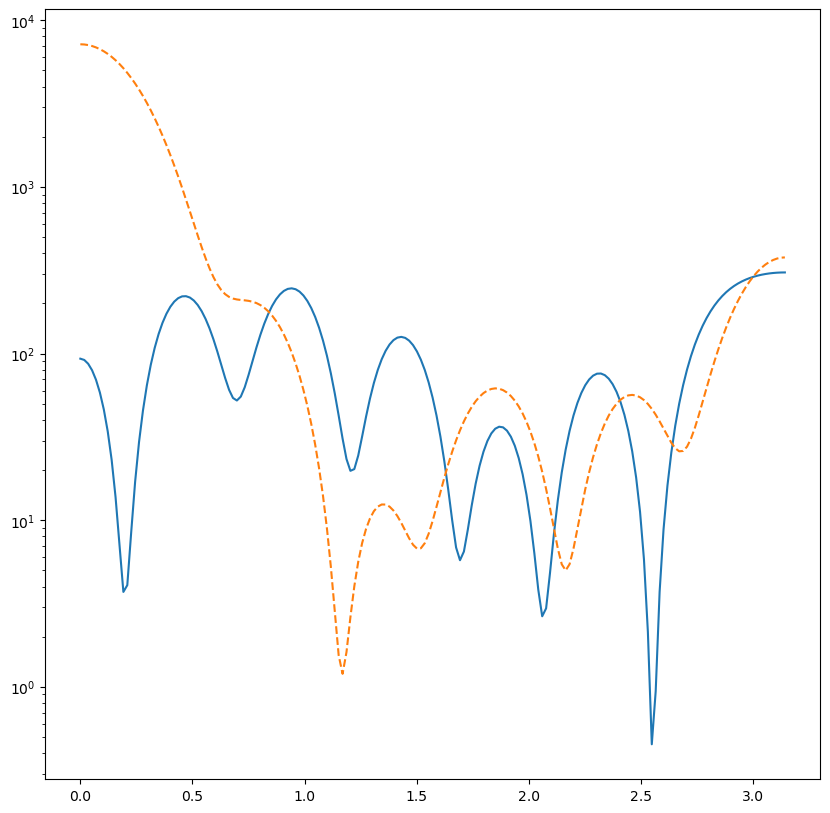

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(1e-4, np.pi, 181), cross_section_tot[0])
plt.plot(np.linspace(1e-4, np.pi, 181), fresco_array, label='FRESCO', linestyle='--')

plt.yscale('log')

In [47]:
## padding works for @ operations if both are padded!

S_scaled = np.zeros((len(S_matrix_pos), 4,4), dtype=np.complex128)
i= 0
for k, k_inv, S in zip(k_arr_pos_, k_arr_pos_inv, S_matrix_pos):
    S_scaled[i,:len(k),:len(k)] = k @ S @ k_inv
    i += 1

S_padded = np.zeros((len(S_scaled), 4, 4), dtype=np.complex128)
for i, S in enumerate(S_matrix_pos):
    S_padded[i, :len(S), :len(S)] = S 

k_padded = np.zeros((len(S_scaled), 4, 4), dtype=np.complex128)
for i, k in enumerate(k_arr_pos_):
    k_padded[i, :len(k), :len(k)] = k

k_inv_padded = np.zeros((len(S_scaled), 4, 4), dtype=np.complex128)
for i, k_inv in enumerate(k_arr_pos_inv):
    k_inv_padded[i, :len(k_inv), :len(k_inv)] = k_inv


compare = k_padded @ S_padded @ k_inv_padded 

#print(S_scaled-compare)


S_padded_neg = np.zeros((len(S_matrix_neg), 4, 4), dtype=np.complex128)
for i, S in enumerate(S_matrix_neg):
    S_padded_neg[i, :len(S), :len(S)] = S 

k_padded_neg = np.zeros((len(S_matrix_neg), 4, 4), dtype=np.complex128)
for i, k in enumerate(k_arr_neg_):
    k_padded_neg[i, :len(k), :len(k)] = k

k_inv_padded_neg = np.zeros((len(S_matrix_neg), 4, 4), dtype=np.complex128)
for i, k_inv in enumerate(k_arr_neg_inv):
    k_inv_padded_neg[i, :len(k_inv), :len(k_inv)] = k_inv


print(len(S_matrix_neg))


compare_neg = k_padded_neg @ S_padded_neg @ k_inv_padded_neg 
unsummed_neg = (compare_neg[:,:,0,np.newaxis,np.newaxis,np.newaxis] * att_solver.spin_proj_neg)/(k_padded_neg[:,0,0,np.newaxis,np.newaxis,np.newaxis,np.newaxis])**2
unsummed_neg = unsummed_neg*np.conj(unsummed_neg)
cross_neg = np.sum(unsummed_neg, axis=(0,2,3))


print(np.shape(compare[:,:,0]))
print(np.shape(att_solver.spin_proj_pos))

unsummed = compare[:,:,0,np.newaxis,np.newaxis,np.newaxis] * att_solver.spin_proj_pos/(k_padded[:,0,0,np.newaxis,np.newaxis,np.newaxis,np.newaxis])**2
unsummed = unsummed * np.conj(unsummed)
print(np.shape(unsummed))

cross = np.sum(unsummed, axis=(0,2,3)) + cross_neg
print(cross)


5
(6, 4)
(6, 4, 5, 5, 180)
(6, 4, 5, 5, 180)
[[8.94516940e+02+0.j 8.84602746e+02+0.j 8.55662959e+02+0.j
  8.09380516e+02+0.j 7.48409555e+02+0.j 6.76170167e+02+0.j
  5.96587559e+02+0.j 5.13798779e+02+0.j 4.31852673e+02+0.j
  3.54428784e+02+0.j 2.84598534e+02+0.j 2.24647465e+02+0.j
  1.75971145e+02+0.j 1.39050087e+02+0.j 1.13501584e+02+0.j
  9.81993182e+01+0.j 9.14457775e+01+0.j 9.11783530e+01+0.j
  9.51879119e+01+0.j 1.01328732e+02+0.j 1.07700867e+02+0.j
  1.12789958e+02+0.j 1.15554737e+02+0.j 1.15458384e+02+0.j
  1.12445820e+02+0.j 1.06874401e+02+0.j 9.94096763e+01+0.j
  9.09005977e+01+0.j 8.22495844e+01+0.j 7.42921068e+01+0.j
  6.76982083e+01+0.j 6.29049113e+01+0.j 6.00842511e+01+0.j
  5.91472402e+01+0.j 5.97799145e+01+0.j 6.15041952e+01+0.j
  6.37539665e+01+0.j 6.59557211e+01+0.j 6.76034015e+01+0.j
  6.83185590e+01+0.j 6.78894008e+01+0.j 6.62853681e+01+0.j
  6.36471566e+01+0.j 6.02551720e+01+0.j 5.64819233e+01+0.j
  5.27355389e+01+0.j 4.94022693e+01+0.j 4.67954970e+01+0.j
  4.5117500

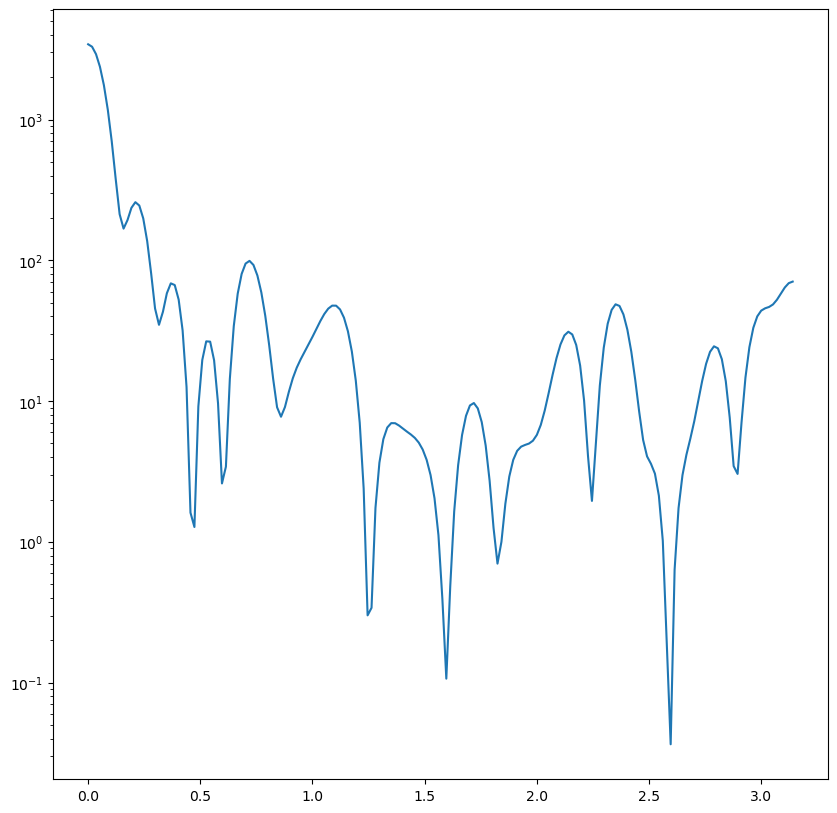

In [29]:
att_spin_proj = Spin_projections_padded(att_solver.quantum_num_pos,att_solver.quantum_num_neg, np.linspace(1e-4, np.pi, 180), solution_number=0)

In [32]:
spin_proj_pos, spin_proj_neg = att_spin_proj.precompute_spin_projections()


In [43]:
print(att_solver.couplings_array_pos[1])
#print(att_solver.couplings_array_neg[0])

[[ 0.        +0.j -0.4472136 +0.j -0.53452248+0.j -0.71713717+0.j]
 [-0.4472136 +0.j  0.        +0.j  0.53452248+0.j  0.        +0.j]
 [-0.53452248+0.j  0.53452248+0.j -0.13690212+0.j  0.24489796+0.j]
 [-0.71713717+0.j  0.        +0.j  0.24489796+0.j  0.4563404 +0.j]]


(180,)


array([0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
       0.-5.55111512e-17j, 0.+0.00000000e+00j, 0.+5.55111512e-17j,
       0.-5.55111512e-17j, 0.+5.55111512e-17j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.+1.11022302e-16j, 0.+0.00000000e+00j,
       0.-5.55111512e-17j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
       0.-1.11022302e-16j, 0.+5.55111512e-17j, 0.+5.55111512e-17j,
       0.-5.55111512e-17j, 0.+0.00000000e+00j, 0.+5.55111512e-17j,
       0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.-1.11022302e-16j, 0.-5.55111512e-17j,
       0.-5.55111512e-17j, 0.+5.55111512e-17j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.-1.11022302e-16j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.-1.11022302e-16j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+